In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from operator import attrgetter
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Задание 2. Проведите анализ оценки платежного поведение когорты 1.01.2021-14.01.2021 (метрики для оценки и визуализации выберите на свое усмотрение). Сделайте выводы по полученным данным.

In [2]:
user_data = pd.read_csv("data/user_data.csv")
user_data.head()

,attributed_touch_time,install_time,event_time,event_name,event_revenue_usd,media_source,channel,campaign_id,adset_id,ad_id,country_code,user_id
0,NaN,2021-01-01 00:08:10.721+00,2021-01-01 00:08:10.721+00,install,NaN,NaN,NaN,NaN,NaN,NaN,VN,1609459686080-7483030925743023347
1,NaN,2021-01-01 00:39:23.948+00,2021-01-01 00:39:23.948+00,install,NaN,NaN,NaN,NaN,NaN,NaN,US,1609461562630-105981105396801528
2,NaN,2021-01-01 00:40:36.525+00,2021-01-01 00:40:36.525+00,reinstall,NaN,NaN,NaN,NaN,NaN,NaN,CZ,1609461625904-7673362380866907786
3,NaN,2021-01-01 00:49:03.486+00,2021-01-01 00:49:03.486+00,reinstall,NaN,NaN,NaN,NaN,NaN,NaN,PT,1609462209340-904240965619919015
4,NaN,2021-01-01 00:51:53.395+00,2021-01-01 00:51:53.395+00,install,NaN,NaN,NaN,NaN,NaN,NaN,US,1609279214347-3174174


In [3]:
data = user_data.copy()

In [4]:
def date_preprocess(s):
    try:
        return datetime.strptime(s+":00", '%Y-%m-%d %H:%M:%S.%f%z')
    except ValueError:
        return datetime.strptime(s+":00", '%Y-%m-%d %H:%M:%S%z')

In [5]:
data['install_time'] = data['install_time'].apply(date_preprocess)

In [6]:
data['event_time'] = data['event_time'].apply(date_preprocess)

In [105]:
# 1.01.2021-14.01.2021

mask = (data['install_time'] >= '2021-1-1 00:00:00') & (data['install_time'] < '2021-1-15 00:00:00')

In [106]:
data = data.loc[mask]

In [107]:
data.loc[(data['event_name'] != "af_purchase") & (data['event_name'] != "af_subscribe")].loc[data['event_revenue_usd'].notna() & data['event_revenue_usd'] != 0]


,attributed_touch_time,install_time,event_time,event_name,event_revenue_usd,media_source,channel,campaign_id,adset_id,ad_id,country_code,user_id


Можем брать только af_purchase и af_subscribe

In [108]:
data = data.loc[(data['event_name'] == "af_purchase") | (data['event_name'] == "af_subscribe")]

In [109]:
data.isna().sum()/len(data)*100

attributed_touch_time    54.270996
install_time              0.000000
event_time                0.000000
event_name                0.000000
event_revenue_usd         0.000000
media_source             54.270996
channel                  54.270996
campaign_id              54.270996
adset_id                 54.270996
ad_id                    54.270996
country_code             23.102504
user_id                   0.000000
dtype: float64

In [110]:
data = data.drop_duplicates()

In [111]:
df_final = data[['install_time','event_time','event_name','event_revenue_usd','country_code','user_id']]
df_final.reset_index(drop= True , inplace= True )

In [112]:
def is_weekday(s):
    return datetime.weekday(s)


def time_of_day(s):
    if 0 <= s.hour <6:
        return "night"
    elif 6 <= s.hour <12:
        return "morning"
    elif 12 <= s.hour <18:
        return "daytime"
    elif 18 <= s.hour <24:
        return  "evening"

In [113]:
df_final['weekday'] = df_final['event_time'].apply(is_weekday)

In [114]:
df_final['time_of_day'] = df_final['event_time'].apply(time_of_day)

In [115]:
df_final.head()

,install_time,event_time,event_name,event_revenue_usd,country_code,user_id,weekday,time_of_day
0,2021-01-01 18:30:08.887000+00:00,2021-01-01 18:53:15.207000+00:00,af_purchase,3.990000,US,1609517919781-0880754,4,evening
1,2021-01-01 18:30:08.887000+00:00,2021-01-01 19:12:19.942000+00:00,af_purchase,29.990000,US,1609517919781-0880754,4,evening
2,2021-01-01 18:30:08.887000+00:00,2021-01-01 19:26:58.060000+00:00,af_purchase,29.990000,US,1609517919781-0880754,4,evening
3,2021-01-01 10:42:04.813000+00:00,2021-01-01 11:17:56.583000+00:00,af_purchase,1.162340,JP,1609489738652-1348117,4,morning
4,2021-01-01 17:07:09.511000+00:00,2021-01-01 20:33:03.619000+00:00,af_purchase,1.353846,UK,1609519185795-4516176,4,evening


In [40]:
df_final['event_revenue_usd'].describe()

count    46008.000000
mean         9.758178
std         13.489329
min          0.010752
25%          3.990000
50%          5.143902
75%         12.990000
max        375.000000
Name: event_revenue_usd, dtype: float64

Text(0.5, 1.0, 'Time')

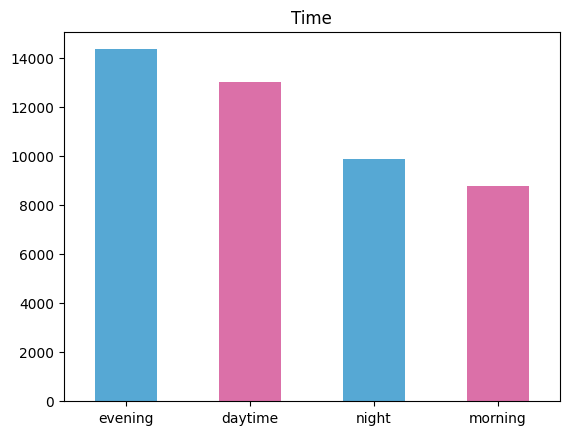

In [41]:
df_final['time_of_day'].value_counts().plot(kind='bar',color=['#56a8d4','#db70a8'],rot=0)
plt.title('Time')

Text(0.5, 1.0, 'Weekday')

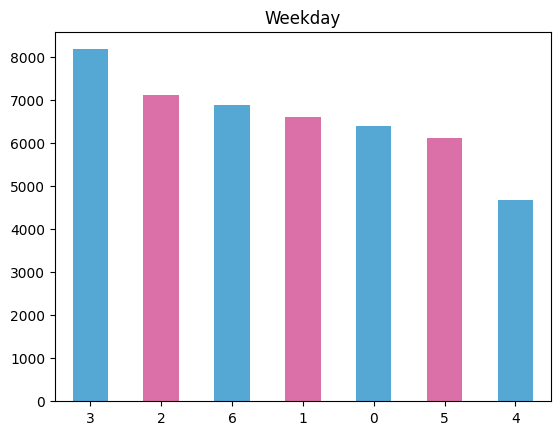

In [42]:
df_final['weekday'].value_counts().plot(kind='bar',color=['#56a8d4','#db70a8'],rot=0)
plt.title('Weekday')

Text(0.5, 1.0, 'Country')

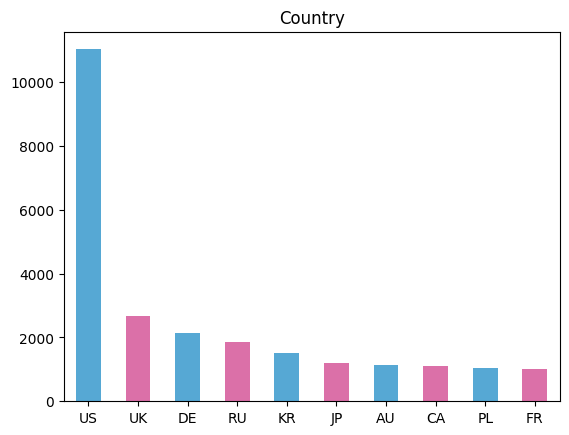

In [43]:
df_final['country_code'].value_counts().nlargest(10).plot(kind='bar',color=['#56a8d4','#db70a8'],rot=0)
plt.title('Country')

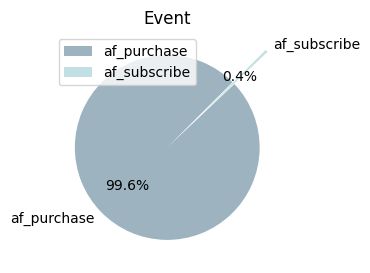

In [44]:
plt.figure(figsize=(3,3))
plt.pie(df_final['event_name'].value_counts(),
        labels = [df_final['event_name'].value_counts().index[0],df_final['event_name'].value_counts().index[1]],
        autopct='%1.1f%%',
        explode=(0,0.5),
        startangle=45,
        colors=['#9db4c0','#c2dfe3'],
        textprops={'fontsize': 10})
plt.title("Event")
plt.legend()
plt.show() 

In [45]:
top_countries = pd.DataFrame(df_final.groupby('country_code')['event_revenue_usd'].sum().sort_values(ascending = False))
top_countries[:10]

,event_revenue_usd
country_code,
US,123355.444463
UK,25874.621855
DE,22039.908653
KR,17101.174039
JP,14864.936662
AU,11080.053865
CA,10933.300755
FR,10895.598374
IT,8817.898959


In [46]:
avg_countries = pd.DataFrame(df_final.groupby('country_code')['event_revenue_usd'].mean().sort_values(ascending = False))
avg_countries[:10]

,event_revenue_usd
country_code,
SI,22.002033
AD,18.656113
IS,17.706245
CH,17.420368
YT,16.976857
CY,16.867462
EG,16.780704
IN,15.846295
NO,15.430856


In [47]:
top_users = pd.DataFrame(df_final.groupby('user_id')['event_revenue_usd'].agg(sum='sum'))
top_users['mean'] = pd.DataFrame(df_final.groupby('user_id')['event_revenue_usd'].agg(mean='mean'))
top_users['quantity'] = pd.DataFrame(df_final.groupby('user_id')['event_revenue_usd'].agg(quantity='count'))
top_users['max'] = pd.DataFrame(df_final.groupby('user_id')['event_revenue_usd'].agg(max='max'))
top_users.sort_values(by=['sum'],ascending = False)[:10]

,sum,mean,quantity,max
user_id,,,,
1610055912964-1625054518915454413,2062.440000,36.829286,56,99.990000
1609694458134-4757548,1779.790000,84.751905,21,99.990000
1610037607814-3857624,1666.410000,28.244237,59,79.990000
1609539262712-4622932247396370811,1535.535550,15.830263,97,122.214155
1609902666153-9310733,1392.810000,73.305789,19,99.990000
1609489283704-1936732,1340.086682,40.608687,33,94.463209
1610140007651-1253360,1303.412208,81.463263,16,110.012763
1609851779274-5515188,1296.088001,54.003667,24,102.488899
1609792503261-7705422100102052613,1064.850000,70.990000,15,99.990000


In [48]:
top_users.sort_values(by=['max'],ascending = False)[:10]

,sum,mean,quantity,max
user_id,,,,
1609789911658-3364586661297477470,375.000000,375.000000,1,375.000000
1610535868775-6162169,280.970000,93.656667,3,199.990000
1610191102673-0904777,324.628844,64.925769,5,136.793834
1609947964705-5681328,135.075889,135.075889,1,135.075889
1610549339944-8535124,197.054612,39.410922,5,133.337213
1610267298732-8817204,129.657561,129.657561,1,129.657561
1609515717068-2748907458864930695,915.180776,39.790469,23,128.833151
1609867963370-1680230225385491322,125.183446,125.183446,1,125.183446
1609708179256-8896162,124.305786,124.305786,1,124.305786


In [49]:
top_users['mean'].describe()

count    14784.000000
mean         7.453917
std         11.188736
min          0.083093
25%          1.332525
50%          4.645618
75%          8.462942
max        375.000000
Name: mean, dtype: float64

In [50]:
weekday = pd.DataFrame(df_final.groupby('weekday')['event_revenue_usd'].agg(sum='sum'))
weekday['mean'] = pd.DataFrame(df_final.groupby('weekday')['event_revenue_usd'].agg(mean='mean'))
weekday['max'] = pd.DataFrame(df_final.groupby('weekday')['event_revenue_usd'].agg(max='max'))
weekday.sort_values(by=['sum'],ascending = False)

,sum,mean,max
weekday,,,
3,86355.488056,10.547879,133.337213
2,70278.568426,9.863659,199.990000
6,64548.069123,9.371090,129.657561
1,63632.310545,9.633961,128.833151
0,60170.929461,9.407587,375.000000
5,59154.314535,9.645249,122.237762
4,44814.582324,9.588058,117.401520


Text(0.5, 1.0, 'Distribution of total sum of payments over weekdays')

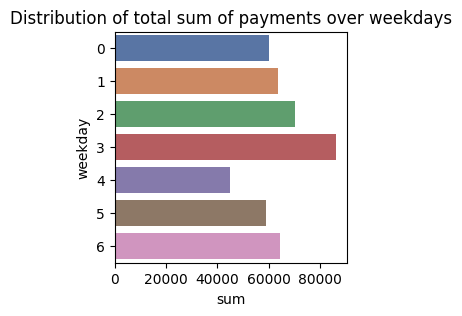

In [51]:
plt.figure(figsize=(3,3))
sns.barplot(x=weekday['sum'],y=weekday['sum'].index,palette='deep',orient='h')
plt.title("Distribution of total sum of payments over weekdays")

In [52]:
time_of_day = pd.DataFrame(df_final.groupby('time_of_day')['event_revenue_usd'].agg(sum='sum'))
time_of_day['mean'] = pd.DataFrame(df_final.groupby('time_of_day')['event_revenue_usd'].agg(mean='mean'))
time_of_day['max'] = pd.DataFrame(df_final.groupby('time_of_day')['event_revenue_usd'].agg(max='max'))
time_of_day.sort_values(by=['sum'],ascending = False)

,sum,mean,max
time_of_day,,,
evening,143621.133631,10.008441,375.000000
daytime,126529.167123,9.733013,135.075889
night,98487.917686,9.966395,136.793834
morning,80316.044030,9.151783,129.657561


Text(0.5, 1.0, 'Distribution of total sum of payments over time of day')

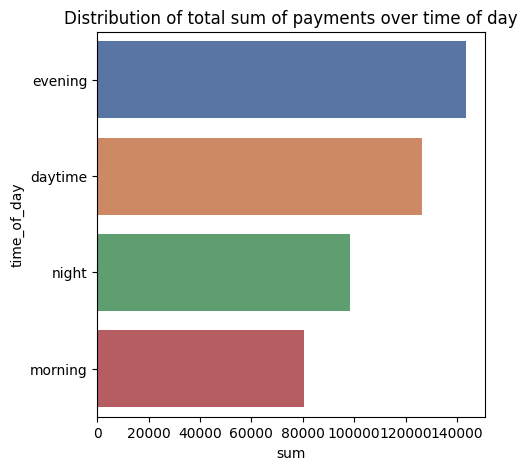

In [53]:
plt.figure(figsize=(5,5))
sns.barplot(x=time_of_day['sum'],y=time_of_day['sum'].index,palette='deep',orient='h',order=time_of_day['sum'].sort_values(ascending=False).index.values)
plt.title("Distribution of total sum of payments over time of day")

In [136]:
df_final['order_day'] = df_final['event_time'].dt.to_period('D')
df_final['type'] = df_final.groupby('user_id')['install_time'].transform('min').dt.to_period('D') 
df_final = df_final.drop(df_final.loc[df_final.order_day  < df_final.type].index)

In [143]:
cohort = df_final.groupby(['type', 'order_day']).agg({'user_id':pd.Series.nunique}).reset_index(drop=False)
cohort.head()

,type,order_day,user_id
0,2021-01-01,2021-01-01,495
1,2021-01-01,2021-01-02,488
2,2021-01-01,2021-01-03,289
3,2021-01-01,2021-01-04,215
4,2021-01-01,2021-01-05,165


In [144]:
cohort['period'] = cohort.order_day - cohort.type
cohort['period'] = cohort['period'].apply(attrgetter('n'))

In [147]:
cohort_final = cohort.pivot_table(index = 'type',columns = 'period',values = 'user_id')
cohort_final = cohort_final.divide(cohort_final.iloc[:,0], axis = 0)

In [148]:
cohort_final = cohort_final.divide(cohort_final.iloc[:,0], axis = 0)

In [149]:
cohort_final.round(3) * 100

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13
type,,,,,,,,,,,,,,
2021-01-01,100.0,98.6,58.4,43.4,33.3,25.3,32.7,30.1,32.5,28.7,20.0,25.1,22.6,27.1
2021-01-02,100.0,91.7,43.9,41.2,35.0,31.6,28.3,32.3,29.8,22.5,22.3,22.1,18.5,NaN
2021-01-03,100.0,78.2,40.5,35.7,34.1,29.3,28.6,28.3,21.4,22.8,19.0,22.5,NaN,NaN
2021-01-04,100.0,83.9,40.2,47.8,46.9,35.1,32.3,31.3,27.7,27.7,33.8,NaN,NaN,NaN
2021-01-05,100.0,81.6,54.5,63.5,50.2,39.2,36.1,36.3,30.0,32.7,NaN,NaN,NaN,NaN
2021-01-06,100.0,80.8,57.6,57.6,45.6,39.0,35.0,34.2,31.9,NaN,NaN,NaN,NaN,NaN
2021-01-07,100.0,89.7,60.6,60.2,47.4,44.6,41.5,46.8,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,100.0,89.0,52.4,57.7,52.0,44.7,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09,100.0,84.3,44.8,49.5,42.1,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


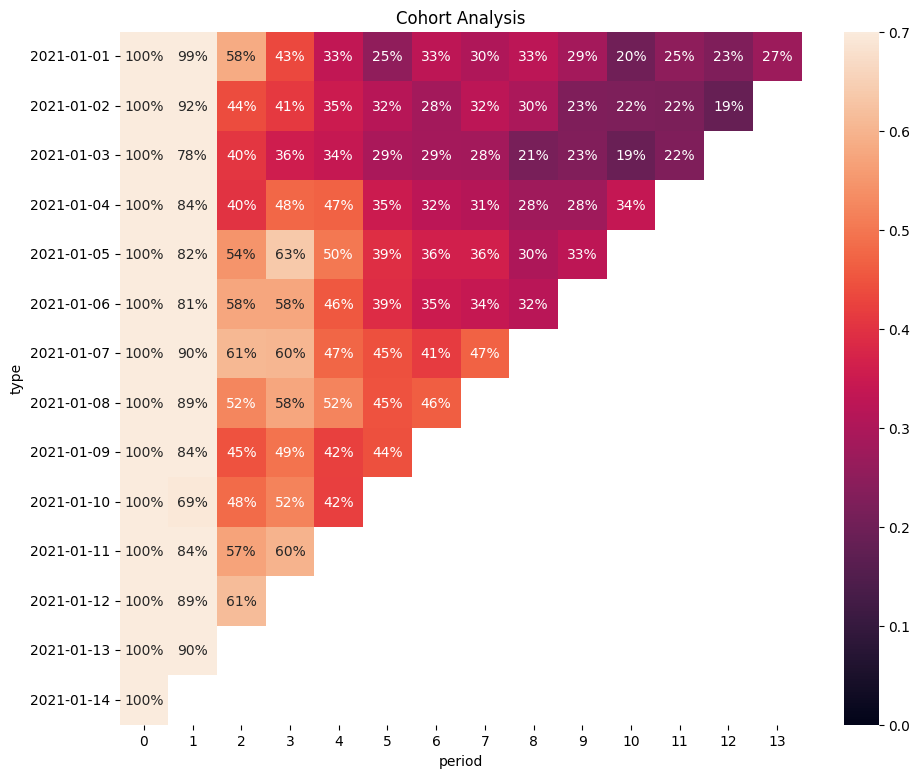

In [151]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis')
sns.heatmap(data = cohort_final, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.7)
plt.show()

Вывод. Большинство пользователей производят свою первую покупку в первый день использования приложения, покупка во второй и третий дни происходит примерно у 60% пользователей из той же когорты. В дальнейшем данный показатель остается примерно на уровне 30% в течение всего остального времени. 

Наибольшая сумма покупок (как и покупки с самым высоким чеком) наблюдалась у пользователей из US, наибольшее число покупок совершалось в вечернее время, самый популярный день для покупки - четверг. Наибольшая сумма, потраченная за все выбранное время одним пользователем - 2062$, при этом, он совершил 56 покупок.